## BP - Self made

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from pandas import Index
from sklearn.metrics import mean_squared_error, r2_score
import sys
import os

notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
sys.path.append(project_root)

from implementation.Neuralnet import NeuralNet

### Data Reading & Scaling

In [7]:
csv_path = os.path.join(project_root, "archive", "preprocessed_files", "processed.csv")
df = pd.read_csv(csv_path)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['price', 'log_price'], errors='ignore')
scaler = MinMaxScaler(feature_range=(0, 1))
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
y_scaler = MinMaxScaler(feature_range=(0,1))
df["log_price"] = y_scaler.fit_transform(df["log_price"].values.reshape(-1,1))

In [8]:

# Selección de 500 filas aleatorias
X = df.drop(columns=["log_price"], axis=1)
y = df["log_price"]

X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)

y = y.values.reshape(-1, 1)

### Train

In [9]:
net = NeuralNet(
    layers=[20, 64, 32, 16, 1],
    epochs=100,
    lr=0.001,
    momentum=0.2,
    function='tanh',
    perc_validation=0.2,
)

net.fit(X, y)

Shuffle y splits realizados:
  Train: 2483 patrones
  Val:   620 patrones
  Test:  775 patrones
Epoch 0: Train Error=0.0101, Val Error=0.0124
Epoch 1: Train Error=0.0074, Val Error=0.0091
Epoch 2: Train Error=0.0063, Val Error=0.0078
Epoch 3: Train Error=0.0058, Val Error=0.0071
Epoch 4: Train Error=0.0056, Val Error=0.0067
Epoch 5: Train Error=0.0054, Val Error=0.0064
Epoch 6: Train Error=0.0052, Val Error=0.0062
Epoch 7: Train Error=0.0051, Val Error=0.0060
Epoch 8: Train Error=0.0050, Val Error=0.0059
Epoch 9: Train Error=0.0049, Val Error=0.0057
Epoch 10: Train Error=0.0049, Val Error=0.0056
Epoch 11: Train Error=0.0048, Val Error=0.0055
Epoch 12: Train Error=0.0048, Val Error=0.0055
Epoch 13: Train Error=0.0047, Val Error=0.0054
Epoch 14: Train Error=0.0047, Val Error=0.0053
Epoch 15: Train Error=0.0046, Val Error=0.0053
Epoch 16: Train Error=0.0046, Val Error=0.0052
Epoch 17: Train Error=0.0046, Val Error=0.0052
Epoch 18: Train Error=0.0046, Val Error=0.0052
Epoch 19: Train Error

### Test

In [10]:
# 1. Predicciones en escala 0–1
predictions = net.predict(net.X_test)
preds_scaled = predictions.reshape(-1, 1)

print("--- PREDICTIONS EN ESCALA DE 0-1 ---")
print(preds_scaled)

# 2. Desescalar log_price
pred_log_price = y_scaler.inverse_transform(preds_scaled)

print("--- PREDICCIONES DES-ESCALADAS (log_price) ---")
print(pred_log_price)

# 3. Obtener precio real
final_prices = np.exp(pred_log_price)

print("--- PRECIOS FINALES ---")
print(final_prices)

--- PREDICTIONS EN ESCALA DE 0-1 ---
[[0.38992403]
 [0.51841192]
 [0.46093053]
 [0.46670155]
 [0.17020183]
 [0.63075798]
 [0.43267849]
 [0.25646168]
 [0.32966072]
 [0.48623645]
 [0.47224482]
 [0.31832898]
 [0.54462954]
 [0.24971335]
 [0.17996835]
 [0.57337716]
 [0.50614601]
 [0.49138236]
 [0.49206133]
 [0.45522138]
 [0.48106366]
 [0.47716133]
 [0.34641025]
 [0.49457153]
 [0.47113446]
 [0.55272995]
 [0.38647282]
 [0.74444033]
 [0.39553169]
 [0.53104529]
 [0.3465135 ]
 [0.39381213]
 [0.3477559 ]
 [0.36297684]
 [0.54061104]
 [0.27848987]
 [0.28810671]
 [0.246106  ]
 [0.31777231]
 [0.53122984]
 [0.55057296]
 [0.60761274]
 [0.38149583]
 [0.35565502]
 [0.19717924]
 [0.14958573]
 [0.37902325]
 [0.30575668]
 [0.4854027 ]
 [0.39961119]
 [0.42446144]
 [0.6824919 ]
 [0.43180203]
 [0.71299621]
 [0.33815886]
 [0.2917066 ]
 [0.51547822]
 [0.38998241]
 [0.6780454 ]
 [0.36875444]
 [0.47246225]
 [0.49066806]
 [0.22966894]
 [0.55956631]
 [0.66175221]
 [0.32969344]
 [0.48929617]
 [0.6277868 ]
 [0.3356981

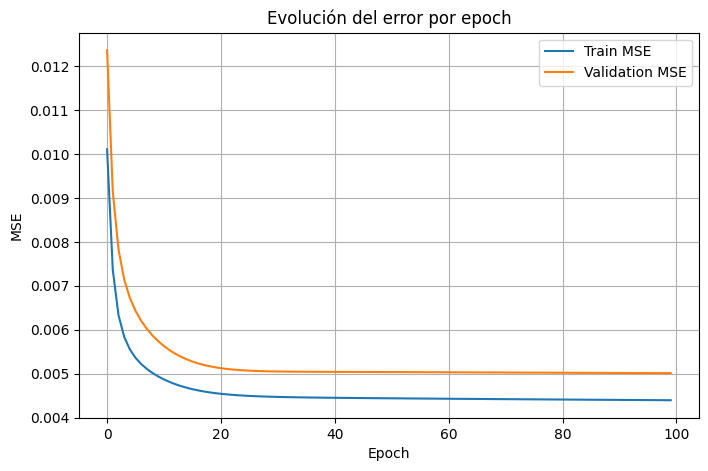

In [11]:
train_errors, val_errors = net.loss_epochs()
plt.figure(figsize=(8,5))
plt.plot(train_errors, label="Train MSE")
if net.X_val.shape[0] > 0:
    plt.plot([e for e in val_errors if e is not None], label="Validation MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Evolución del error por epoch")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
def mean_squared_error(y_true, y_pred):
    """Calcula el Error Cuadrático Medio (MSE)."""
    return np.mean((y_true - y_pred)**2)

def mean_absolute_error(y_true, y_pred):
    """Calcula el Error Absoluto Medio (MAE)."""
    return np.mean(np.abs(y_true - y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    """Calcula el Error Absoluto Porcentual Medio (MAPE)."""
    # Se usa np.clip para evitar la división por cero si y_true es 0
    y_true_clipped = np.clip(y_true, a_min=1e-8, a_max=None)
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true_clipped))


--- MÉTRICAS DE EVALUACIÓN FINAL (PRECIO ORIGINAL) ---
MSE (Mean Squared Error): 22469937026.63
MAE (Mean Absolute Error): 99170.47
MAPE (Mean Absolute Percentage Error): 19.20%
R2 (Coefficient of Determination): 0.6689


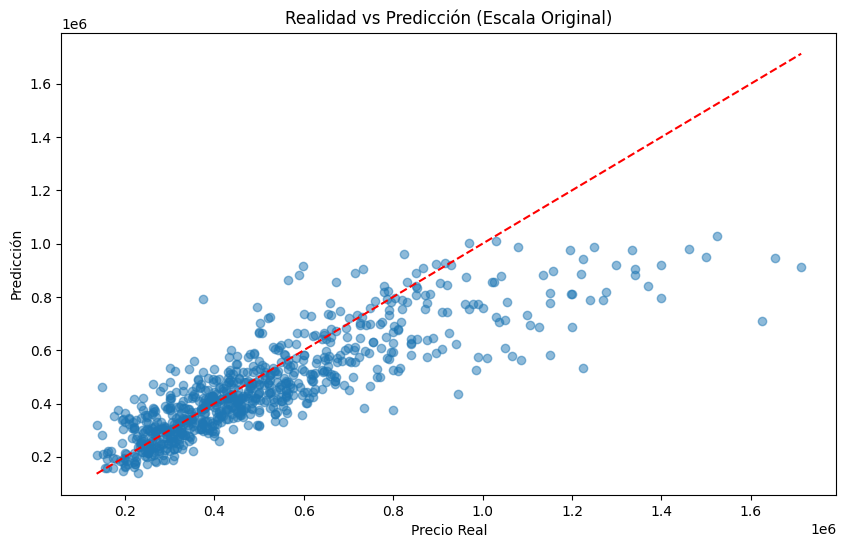

In [13]:
y_test_log = net.y_test.reshape(-1, 1)
y_test_log = y_scaler.inverse_transform(y_test_log) 

y_test_original = np.exp(y_test_log)


print("\n--- MÉTRICAS DE EVALUACIÓN FINAL (PRECIO ORIGINAL) ---")

mse = mean_squared_error(y_test_original, final_prices)
print(f"MSE (Mean Squared Error): {mse:.2f}")

mae = mean_absolute_error(y_test_original, final_prices)
print(f"MAE (Mean Absolute Error): {mae:.2f}")

mape = mean_absolute_percentage_error(y_test_original, final_prices)
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

r2 = r2_score(y_test_original, final_prices)
print(f"R2 (Coefficient of Determination): {r2:.4f}")

plt.figure(figsize=(10,6))
plt.scatter(y_test_original, final_prices, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 'r--') # Línea perfecta
plt.xlabel('Precio Real')
plt.ylabel('Predicción')
plt.title('Realidad vs Predicción (Escala Original)')
plt.show()